<h2>Airbnb Listings in New York City</h2>

<b>Problem Statement:</b>

The goal of this analysis is to uncover valuable insights from Airbnb listings in New York City to assist hosts, guests, and stakeholders in making informed decisions. By examining various factors such as host experience, neighborhood characteristics, property types, room types, pricing, and review scores, we aim to answer the following questions:

 - How does host experience impact review scores?
 - Which neighborhoods offer the highest average prices and the best review scores?
 - How do property types and room types influence pricing and review scores?
 - What is the relationship between the number of listings and the number of reviews across different neighborhoods?
 - Is there an optimal price point that maximizes review scores?
 - How does the number of beds in a listing affect its price and review scores?
 - Which zip codes have the highest average prices and review scores?
 - How have prices and review scores trended over time?

By answering these questions, we aim to provide a comprehensive overview of the Airbnb market in New York City, offering actionable insights for improving listing performance and enhancing guest experiences.

In [90]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
# Load the dataset
data = pd.read_excel("archive\\airbnb.xlsx")

In [92]:
# check the shape of data
data.shape

(30478, 13)

In [93]:
# view some records from data
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [94]:
# datatypes present
data.dtypes

Host Id                                int64
Host Since                    datetime64[ns]
Name                                  object
Neighbourhood                         object
Property Type                         object
Review Scores Rating (bin)           float64
Room Type                             object
Zipcode                              float64
Beds                                 float64
Number of Records                      int64
Number Of Reviews                      int64
Price                                  int64
Review Scores Rating                 float64
dtype: object

In [95]:
# descriptive statistics
data.describe(include='all').T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2060\3188151485.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Host Id,30478.0,NaN,NaN,NaN,NaT,NaT,12731707.882243,11902702.99266,500.0,2701298.5,8551693.0,21206171.75,43033067.0
Host Since,30475,2240,2014-02-10 00:00:00,70,2008-06-26,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,30478,29416,Charming West Village studio,15,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighbourhood,30478,5,Manhattan,16033,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property Type,30475,19,Apartment,27102,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review Scores Rating (bin),22155.0,NaN,NaN,NaN,NaT,NaT,90.738659,9.059519,20.0,85.0,90.0,100.0,100.0
Room Type,30478,3,Entire home/apt,17024,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zipcode,30344.0,NaN,NaN,NaN,NaT,NaT,10584.854831,921.299397,1003.0,10017.0,10065.0,11216.0,99135.0
Beds,30393.0,NaN,NaN,NaN,NaT,NaT,1.530089,1.015359,0.0,1.0,1.0,2.0,16.0
Number of Records,30478.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [96]:
# concise summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

In [97]:
# check for duplicate records
data.duplicated().sum()

17

In [98]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [99]:
# check for null/missing values
data.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8309
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8309
dtype: int64

In [100]:
# fill nan values in Review Scores Rating by median value
data['Review Scores Rating'].fillna(data['Review Scores Rating'].median(), inplace=True)

In [101]:
# drop the column Review Scores Rating (bin) as it is not necessary for our analysis
data = data.drop(['Review Scores Rating (bin)'], axis=1)

In [102]:
# remaining nan values are less so we will drop them
data.dropna(subset=['Host Since', 'Property Type', 'Zipcode', 'Beds'], inplace=True)

In [103]:
data.shape

(30237, 12)

In [104]:
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024.0,3.0,1,0,199,94.0
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,1,39,549,96.0
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,1,80,90,94.0


In [105]:
# check for duplicate records
data.duplicated().sum()

0

In [106]:
# check for null/missing values
data.isnull().sum()

Host Id                 0
Host Since              0
Name                    0
Neighbourhood           0
Property Type           0
Room Type               0
Zipcode                 0
Beds                    0
Number of Records       0
Number Of Reviews       0
Price                   0
Review Scores Rating    0
dtype: int64

<h3>Host Experience and Review Quality</h3>

In [112]:
# Define the reference date
reference_date = pd.to_datetime('2015-12-31')

In [115]:
# create a column with name Host Experience in Years
data['Host Experience (years)'] = round((reference_date - data['Host Since']).dt.days / 365.25,2)

In [116]:
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Host Experience (years)
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024.0,3.0,1,0,199,94.0,7.51
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,1,39,549,96.0,7.51
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,1,4,149,100.0,7.43
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,1,9,250,100.0,7.38
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,1,80,90,94.0,7.38


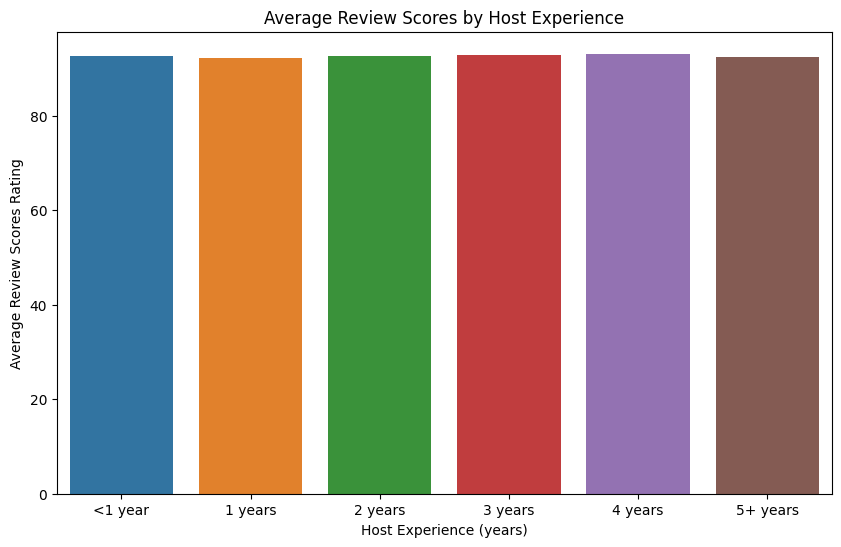

In [119]:
# Plotting Average Review Scores by Host Experience
experience_bins = pd.cut(data['Host Experience (years)'], bins=[0, 1, 2, 3, 4, 5, 10], labels=[
    '<1 year', '1 years', '2 years', '3 years', '4 years', '5+ years'])
avg_review_by_experience = data.groupby(experience_bins)['Review Scores Rating'].mean().dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_review_by_experience.index, y=avg_review_by_experience.values)
plt.title('Average Review Scores by Host Experience')
plt.xlabel('Host Experience (years)')
plt.ylabel('Average Review Scores Rating')
plt.show()

In [ ]:
)